In [1]:
import yfinance as yf
import pandas as pd #Changes the layout from numpy array to pandas series. 
import os
import matplotlib.pyplot as plt

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [3]:
sp500.index = pd.to_datetime(sp500.index) #column on the left

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,0.0,0.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,0.0,0.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0


<Axes: xlabel='Date'>

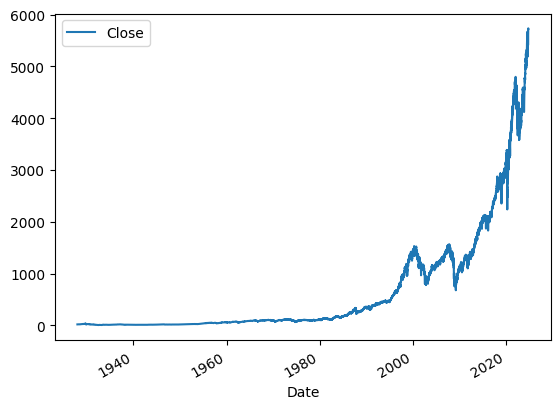

In [5]:
sp500.plot.line(y="Close", use_index=True) #shows the index/trading days on x axis and closing price on y axis

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]
#Could predict if the price goes up or down tomorrow but the model can be accurate but can still lose money because buying or selling stocks you dont care about accurate on the price but care more
#about the direction. If the price goes up or down so i know can i buy the stock and it will go up. I could predict the actual price but be far from knowing if it goes up or down.

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [30]:
sp500 #Target Column. 1 if price went up (if tomorrow price is > than todays price) and 0 when price went down

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0,1.008417,1.0,1.012138,4.0,1.035452,37.0,1.136523,147.0,1.310323,528.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0


In [9]:
sp500 = sp500.loc["1990-01-01":].copy() #Takes the rows where the index is at least Jan 1st 1990 > (to get rid of old data) .copy is there when assigning to a subset in the future

In [31]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0,1.008417,1.0,1.012138,4.0,1.035452,37.0,1.136523,147.0,1.310323,528.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0


In [ ]:
#Set up data ----

In [10]:
from sklearn.ensemble import RandomForestClassifier

#trains individual decision trees with randomised parameters and then avg results from decision trees
#Pick up non-linear tendencies ex. No linear relationship between the Opening price and the target. If the opening price is higher that doesnt mean the target price will be higher. Most relations are
#non-linear

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#the higher the n_estimators is better accuracy to a limit, min_samples_split helps us protect against overfit if they build the DT too deeply. The higher we set it the less accurate the model will 
#be but the less it will overfit. random_state = 1 setting a random state means that if we run the same model twice that means it will run a predicatable sequence, running it twice will give same 
#output instead of something random.

train = sp500.iloc[:-100] #Time series data. Can't use cross validation (can but horrible in real world scenario), If use cross validation or any test set that doesnt take time series data into
                            #account it will be using future data to predict the pass. Leakage as putting future data into the model
test = sp500.iloc[-100:]    #Put all the rows except the last 100 rows into the TRAINING SET and last 100 rows into the TEST set. Easiest way to do the split.

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])  #train the model and use the predictor columns to predict the target column

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score #precision score is when we said that if the market goes up/target is a 1 did it actually go up?% In the case of buying / selling stock

preds = model.predict(test[predictors]) #Generate predictions that are in a numpy array
preds = pd.Series(preds, index=test.index) #Same index as test dataset
precision_score(test["Target"], preds) #Not a good precision score. When we want it to go up it only goes up 53% of the time. Time to do accurate predictions by plotting

np.float64(1.0)

<Axes: xlabel='Date'>

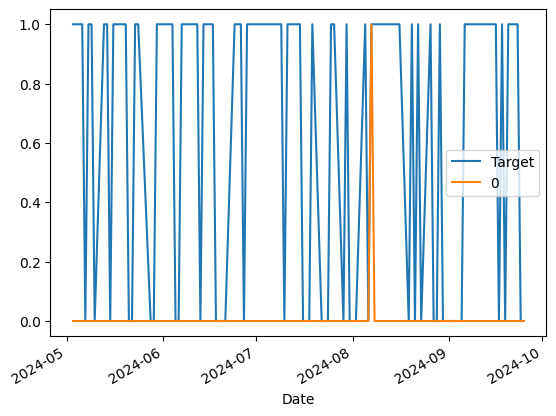

In [13]:
# plot our predictions by combining our actual values with our prediction values and use pandas concat function to do that, concatenating our test target (which is our actual values and our predicted values) and we are going to
# pass in axis = 1 to treat each of these inputs as a column in our dataset
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
#The orange line (0) is our predictions and the BLUE line is what actually happened. We can see that it predicted that it went down but it acutally went up so its far off
#V Building a more better way to test the algo, we can only test against the last 100 days but if we wanna use this in the real world, then we need it to test across years of data and 
#see what the algo does with some situations
## Backtesting - Create prediction function and this will fitting of the model by using the training predictors and the Target, Generates our prediction (model.predict), 
#Combining the model into a series but only diff is a name=predictions and finally its combining everything together, At the end return combined data frame with the acutal value in the predictions

In [14]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [15]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [16]:
predictions = backtest(sp500, model, predictors)

In [17]:
predictions["Predictions"].value_counts()

Predictions
0    3654
1    2596
Name: count, dtype: int64

In [18]:
#look at the prediction score,
precision_score(predictions["Target"], predictions["Predictions"])
#Out of all the predictions it made, When the model said the market would go up, it went up 71% of the time. Good or not? Lets see VVVV

np.float64(0.5288906009244992)

In [19]:
predictions["Target"].value_counts() / predictions.shape[0] #%days of where the market acc went up. Look at the value counts of the Target / No of rows total = %

Target
1    0.53568
0    0.46432
Name: count, dtype: float64

In [20]:
#Shows us that S&P500 went up 53% of days and went down 46% of days. 
# Now the model needs more predictors 
#Mean Closing price in [last 2 days , last trading week, last 3 months, last year, last 4 years], Find ratio between todays closing price and closing price in those periods, Has the market gone up it may gave due for a downturn
#vice versa, Giving algo better data for better predictions
horizons = [2,5,60,250,1000]
new_predictors = [] #Better predictors which will hold some new columns that are going to be created

for horizon in horizons:  # Loop through these horizons and calculate a rolling average against that horizon
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"  #Create some columns, (Close Ratio 2, Close Ratio 5, etc..), Ratio COlumn
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # Add it to the S&P500 data frame.( Close price in the s&p / rolling average = ) 1st loop - ratio between todays close and avg close in the last 2 days
                                                                       #2nd loop it will be the ratio between todays close and the average close in the last 5 days and so on....
    
    trend_column = f"Trend_{horizon}" #We can look at a trend, a trend is the number of days in the past x days that the stock price acc went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]  # Shifting forward and find the rolling sum of the target. THE SUM OF THE NUMBER OF DAYS WHERE THE STOCK PRICE ACTUALLY WENT UP
    
    new_predictors+= [ratio_column, trend_column]

In [32]:
sp500 
#when pandas can not find enough days/rows prior to the current row to actually compute a rolling avg it will print NaN
#example: Close_ratio_2 is based on the rolling average of the 2 days prior to and including the current day. So on Jan 2nd 1990 there are no days before this
#So it cant acc compute a rolling avg so it returns NaN. Next day it can (jan 3rd) as it takes that day and the day before.
#However Trend is a lil different as u cant include the current day so here its looking for 2 previous days as if u did then it would include todays target in that column which will include 
#leakage and wont work in the real world

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0,1.008417,1.0,1.012138,4.0,1.035452,37.0,1.136523,147.0,1.310323,528.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0


In [21]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"]) #too get rid of some extra rows

In [22]:
sp500 #Can now see that it starts at 1993 as it took 4 years of data to compute those (Close ratio 1000 / Trend 1000)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,5702.629883,5733.569824,5686.419922,5713.640137,4024530000,5702.549805,0,1.008417,1.0,1.012138,4.0,1.035452,37.0,1.136523,147.0,1.310323,528.0
2024-09-20 00:00:00-04:00,5709.640137,5715.140137,5674.490234,5702.549805,7867260000,5718.569824,1,0.999029,1.0,1.007442,3.0,1.032741,36.0,1.133071,147.0,1.307070,528.0
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,5732.930176,1,1.001403,1.0,1.007230,3.0,1.034906,36.0,1.135008,147.0,1.310035,528.0


In [23]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1) #update model - increase estimators (200) , reduce min sample split to 50 and keep random state

In [24]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #Probability instead of numbers as ratios are a better unit for predictions than numbers as we need to know if it goes up or down the next day.
    preds[preds >=.6] = 1 #Tells us that the price is going up if the probability is higher than 60%
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [25]:
predictions = backtest(sp500, model, new_predictors)

In [26]:
predictions["Predictions"].value_counts()

Predictions
0.0    4404
1.0     846
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.574468085106383)

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.545333
0    0.454667
Name: count, dtype: float64

In [29]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-09-19 00:00:00-04:00,0,0.0
2024-09-20 00:00:00-04:00,1,0.0
2024-09-23 00:00:00-04:00,1,0.0
